# **Prueba 2 - analizando los crímenes en la ciudad de Nueva York**

##Francisca Pinto | Francisco Silva

##_06 de noviembre de 2021_

## **Flujo de trabajo de Hito I**

Se presenta el índice de la entrega.

1. Contexto del DataFrame
2. Enunciado y objetivos
3. Estrategia de división de muestras
4. Librerías a utilizar
5. Funciones externas
6. Identificación de vectores objetivo
7. Grilla tentativa de modelos
8. Métricas a aplicar para la calificación de los modelos
9. Estrategia para abordar cada modelamiento
10. Estrategia de pre-procesamiento
11. Descripción de atributos y análisis de vectores objetivo
12. Importe del DataFrame y revisión de atributos
13. Registro de datos nulos
14. Pre-procesamiento de atributos: acciones a considerar

## **1. Contexto**

El DataFrame es un extracto de los reportes de <code>Stop and Frisk</code> anuales de la Policía del estado de Nueva York (Estados Unidos), procedimientos en los cuales el personal pueden detener y registrar a personas, en base a ciertas condiciones de sospecha. 

La idea original de esta medida era, además de encontrar más involucrados en delitos, disminuir la cantidad de armas sin autorización en posesión de civiles, así como también especies de contrabando [1, 2].

La iniciativa ha sido fuertemente criticada ya que, como se verá más adelante, la información recolectada incorpora datos que segmentan racialmente a los sospechosos, que según organizaciones como la <code>New York Civil Liberties Union</code>, demuestra el sesgo racista del personal. Por otro lado, la medida ha generado polémicas ya que una gran cantidad de las acciones ejercidas no han tenido resultados: cerca del <code>90%</code> de las personas detenidas y controladas eran inocentes [3].



## **2. Enunciado y objetivos**

### **Enunciado**

1. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos perdidos y presente su esquema de recodificación. Tenga presente que lo que observe en el análisis exploratorio debe guiar su proceso de ingeniería de atributos, por lo que se recomienda que piense en aspectos de las variables involucradas que puedan afectar el proceso mencionado.

2. Reporte la probabilidad de que un individuo sea arrestado en uno de los cinco barrios, condicional al género y la raza. Concluya ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?

3. Entregue un modelo predictivo que prediga efectivamente si un determinado procedimiento terminará en arresto o no. Para ello, guíese por lo siguiente:
* Entrene por lo menos 3 modelos que sean capaces de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos 2 métricas de desempeño.
* Refine aquellos atributos relevantes con alguna estrategia que crea conveniente y reporte por lo menos 5 atributos relevantes para realizar la predicción.

4. Genere al menos 5 modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta.
* Para ello, debe generar un nuevo atributo como vector objetivo que indique cuándo hubo acción violenta o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia.

5. Seleccione los 2 mejores modelos, serialícelos y envíelos con la evaluación. Recuerde que el modelo serializado debe ser posterior al <code>.fit()</code>, para poder ejecutar <code>.predict()</code> en los nuevos datos.

### **Objetivos**

En base a lo presentado en el enunciado, se generan objetivos que guiarán el proceso de desarrollo de la evaluación.

1. Revisar y presentar los atributos del DataFrame, para conocer los tipos de dato ingresados y su posible relevancia para el desarrollo de los modelos posteriormente.
2. Caracterizar los atributos y vector objetivo, para reconocer sus distribuciones y comportamiento en el DataFrame.
3. Definir y aplicar una estrategia de pre-procesamiento, que permita: tratar los datos perdidos, codificar de forma legible para los modelos de cada variable, y junto con ello una adecuada interpretación de estos valores.Junto con lo anterior se analizará la posibilidad de eliminar posibles atributos, si se considera que no aportan información suficiente para la modelación.
4. Definir la forma de abordar cada modelación: en base a lo entregado en el enunciado se definirá cómo abordar cada problema, desde los modelos a evaluar, así como también desde los atributos a incorporar en cada caso.
5. Evaluar los modelos tentativos en base a métricas que se definirán en secciones posteriores, y decidir cuáles presentan mejor comportamiento.
6. Concluir en base a los resultados en relación a la modelación, datos entregados y posibles implicancias de la utilización de algoritmos con este tipo de variables en la vida real.



## **3. Estrategia de división de muestras**

Siguiendo los requerimientos solicitados en la prueba, para el proceso de entrenamiento de los modelos se utilizará el DataFrame del año 2009.

Por otro lado, se dividirá el DataFrame del año 2010, así se utilizará para el proceso de testing y se dejará una parte como <code>hold out sample</code>. La separación en este caso se realizará con el método <code>train_test_split</code> para asegurar que se tomarán observaciones aleatoriamente, para formar grupos con igual cantidad de observaciones cada uno (<code>test_size = 0.5</code>).

# **CONTIENE CORRECCIONES HITO 1**

## **4. Librerías y versiones correspondientes**

### **Librerías para lectura de DataFrames, manejo de arrays y elaboración de gráficos**

1. <code>Pandas</code>: importación y procesamiento de DataFrames. Se importa librería completa. Versión <code>1.1.5</code>.
2. <code>Numpy</code>: manejo y operaciones sobre arrays. Se importa librería completa. Versión <code>1.19.5</code>.

3. <code>Matplotlib</code>: colección de funciones de librería MatplotLib, que facilitan la creación de gráficos y sus elementos auxiliares para mejorar su comprensión. Se importa <code>pyplot</code>.

4. <code>Seaborn</code>: complemento a <code>Matplotlib</code> para la creación de gráficos. Se importa librería completa. Versión <code>0.11.2</code>.

5. <code>Numpy</code>: complementario a 3., útil para la creación de gráficos. Se importa librería completa. Versión <code>0.11.2</code>.

### **Preprocesamiento, modelos y sus métricas, reducción de dimensionalidad**

6. <code>Scikit Learn</code>: incorpora métodos para el procesamiento de atributos en el dataframe, así como modelos supervisados y no supervisados y las métricas asociadas a cada uno para su posterior evaluación. Además de lo anterior, también contiene módulos como <code>PCA</code> para cambios en la dimensionalidad del conjunto de predictores. Versión <code>0.22.2</code>.

Se importa:

* <code>linear_model</code>: <code>LogisticRegression</code>
* <code>metrics</code>: <code>accuracy_score</code>, <code>precision_score</code>, <code>recall_score</code>, <code>f1_score</code>, <code>classification_report</code>, <code>roc_curve</code>, <code>roc_auc_score</code>
* <code>tree</code>: <code>DecisionTreeClassifier</code>
* <code>ensemble</code>: <code>RandomForestClassifier</code>, <code>AdaBoostClassifier</code>, <code>GradientBoostClassifier</code>, <code>VotingClassifier</code>
* <code>naive_bayes</code>: <code>GaussianNB</code>
* <code>preprocessing</code>: <code>OneHotEncoder</code>
* <code>decomposition</code>: <code>PCA</code>
* <code>discriminant_analysis</code>: <code>LinearDiscriminantAnalysis</code>, <code>QuadraticDiscriminantAnalysis</code>
* <code>SVM</code>: <code>SVC</code>

### **Análisis Factorial**

7. <code>factor_analyzer</code>: necesaria para realizar análisis factorial de atributos (permite la detección de factores latentes), y tiene módulos para calcular métricas que validan la factibilidad de este análisis (esfericidad y <code>kmo</code>).

Se importa:
* <code>factor_analyzer</code>: <code>calculate_bartlett_sphericity</code>, <code>calculate_kmo</code>

### **Balanceo de clases**

8. <code>imbalanced learn</code>: librería con métodos para balancear clases en problemas de clasificación.

Se importa:
* <code>under_sampling</code>: <code>RandomUnderSampler</code>.

### **Opcionales**

8. <code>IPython autotime</code>: para mostrar el tiempo de ejecución de celdas.
9. <code>warnings</code>: permite ocultar avisos en la ejecución de cada celda, relacionados con deprecación de módulos o posibles inconsistencias en el análisis de la información ingresada. 
10. <code>glob</code>: se incorpora librería para la importación de los dataset de cada año y juntarlos para el pre-procesamiento.

## **5. Funciones externas**

No se considera el uso de funciones externas.

## **6. Identificación de vectores objetivo**

1. Caso 1: en el primer caso el vector objetivo es <code>arstmade</code>: indica si se realizó o no un arresto.
2. Caso 2: en el segundo caso el vector objetivo no existe en el DataFrame. Se incorporará un nuevo vector denominado <code>pf_general</code> que combinará la información de todas las variables con prefijo <code>pf</code>: en cada observación que contenga en una o más ocasiones una confirmación del uso de fuerza física (cualquiera sea su tipo), este vector tendrá valor <code>1</code>, de lo contrario tendrá valor <code>0</code>.

## **7. Grillas tentativas de modelos**

Las grillas tentativas para cada caso serán las siguientes:

1. **Caso 1: probabilidad de arresto:**

Modelo 1

```
LogisticRegression():

{
  penalty : "l1", "l2", "elasticnet",
  class_weight : "balanced",
  max_iter : [100, 200]
}

```

Modelo 2

```
SVC():

{
  kernel : "rbf", "sigmoid",
  gamma : [0.001, 0.1, 1, 10],
  C : [0.01, 1, 100]
}

```
Modelo 3

```
RandomForestClassifier():

{
  n_estimators : [50, 100, 300],
  max_depth : [5, 10, 15],
  max_features : "sqrt", "log2" 
}
```

2. **Caso 2: probabilidad de acciones violentas policiales:**

Modelo 1

```
AdaBoostClassifier():

{
  n_estimators : [50, 500, 1000],
  learning_rate : [0.01, 0.1, 0.6]
}

```

Modelo 2

```
GradientBoostClassifier():

{
  learning_rate : [0.01, 0.1, 0.6],
  n_estimators : [50, 200, 400],
  max_features : "sqrt", "log2",
  ccp_alpha : [0.1, 0.5, 1]
}

```

Modelo 3

```
RandomForestClassifier():

{
  n_estimators : [50, 200, 400],
  max_depth : [5, 15, 30],
  max_features : "sqrt", "log2" 
}

```

Modelos 4 y 5:
```
Ensamble Voting Classifier:

{estimators:
            ("reglog" : LogisticRegression()),
            ("rfc" : RandomForestClassifier()),
            ("supvecclass" : SVC()),
            ("gboost" : GradientBoostClassifier()),
}

{weights:
        [0.25, 0.25, 0.25, 0,25], #modelo 4
        [0.15, 0.30, 0.25, 0.30]  #modelo 5
}

```

## **8. Métricas para la calificación de los modelos**

Las métricas de desempeño a utilizar son las típicamente relacionadas a algoritmos de clasificación. Antes de definir cada una es necesario partir por conceptos que estas utilizan (definiciones 1 a 6):

1. <code>True Positive (TP): observación positiva (en este caso 1) categorizada correctamente.</code>
2. <code>True Negative (TN): observación negativa (en este caso 0) categorizada correctamente.</code>
3. <code>False Positive (FP): observación positiva categorizada incorrectamente, si se compara con y_test en realidad es negativa.</code>
4. <code>False Negative (FN): observación negativa categorizada incorrectamente, si se revisa y_test esta es positiva.</code>
5. <code>Positive (P): observaciones positivas (1), sin importar si son correctas o no.</code>
6. <code>Negative (N): observaciones negativas (0), sin importar si son correctas o no.</code>

### **Métricas**

7. **Accuracy**: se define como:

\begin{align}
Accuracy = \frac{TP + TN}{P + N}
\end{align}

<code>accuracy</code> permite definir la capacidad de predecir del modelo de manera general, ya que no discrimina entre tipos de error.

> Como las métricas definidas más adelante, los valores de <code>accuracy</code> oscilan entre <code>0</code> y <code>1</code>, y se busca tener valores lo más cercanos a <code>1</code> posible.

En general, al revisar el <code>classification report</code>, se observará el <code>accuracy</code> ponderado del modelo completo más que la métrica por clase.

8. **Precision**: definida como:

\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}

<code>precision</code> se puede interpretar como la proporción de casos en los que el modelo predijo correctamente los casos positivos, respecto al total de positivos predichos (que también considera los valores positivos que en realidad eran falsos).

Distinto a lo visto en <code>accuracy</code>, al revisar el <code>classification report</code>, se observará el <code>precision</code> por clase y la general para calificar el modelo.

9. **Recall**: definida como:

\begin{align}
Recall = \frac{TP}{TP + FN}
\end{align}

<code>recall</code> es complementaria a <code>precision</code> y trabaja con Falsos Negativos: indica la capacidad del modelo de predecir casos verdaderamente positivos, pero respecto a los casos que en realidad lo eran, que incluye además los que fueron predichos como negativos erradamente.

Homólogo a <code>precision</code>, al revisar el <code>classification report</code>, se observará la métrica por clase y la general para calificar el modelo.

10. **f1-score**: se define como:

\begin{align}
f1-score = \frac{2*Precision*Recall}{Precision + Recall}
\end{align}

<code>f1-score</code> busca ponderar <code>precision</code> y <code>recall</code> del modelo, realizando una media armónica de ambos valores, que además castiga un mal comportamiento de alguna de ellas, bajando este valor.

11. **ROC AUC Score**: esta métrica compara el comportamiento del modelo, comparándolo con un <code>benchmark</code> de un clasificador aleatorio. Para mostrarlo de mejor manera se suele mostrar en un gráfico con eje X: False Positive Rate, y eje Y: True Positive Rate. Lo que se busca es que el comportamiento del modelo supere el <code>benchmark</code>, y el score asociado es la integral del comportamiento del modelo por sobre esta meta. Se pueden encontrar más detalles en [4].

# **CONTIENE CORRECCIONES HITO 1**

## **9. Estrategia para abordar cada modelamiento**

Cada problema tendrá diferencias respecto a la cantidad de datos a tomar.

1. **Caso 1, Probabilidad de arresto:** en este caso se tomará en conjunto con el vector objetivo las variables relacionadas al barrio (atributo <code>city</code> con su re-codificación posterior), junto con las de descripción física del sospechoso.
2. **Caso 2, Probabilidad de uso de violencia policial:** en esta ocasión se utilizará, además del vector objetivo a crear <code>pf_general</code>, los atributos siguientes:
* Variables globales
* Variables relacionadas con armas
* Motivos de control, registro y búsqueda de personas
* Características físicas


> Nota: se utilizarán los predictores resultantes luego de la etapa de procesamiento. Algunos de los presentados en la sección 11 no serán parte de los modelos ya que serán eliminados, y otros serán transformados según se indica en 14.

[MODIFICADO CORRECCIÓN HITO 1]

## **10. Estrategia de preprocesamiento de DataFrame**

Según las descripciones ya hechas de las variables, ahora se resumirán las acciones a tomar con las que necesitan ser modificadas.

1. **Variables a eliminar**: algunos atributos serán eliminados del DataFrame ya que no aportan información para mejorar el comportamiento de los modelos: es información redundante con otros atributos, o bien, son variables que los algoritmos podrían malinterpretar, como por ejemplo, numeración de calles (tipo de dato <code>int</code>), que puede entenderse como una jerarquía que en realidad no existe.

2. **Variables a re-codificar**: en este caso los atributos serán re-escritos para que los algoritmos puedan procesarlos correctamente, ya que contienen información de tipo <code>string</code>. Se tendrán dos alternativas: <code>One Hot Encoding</code> (tipo <code>dummy</code>) y <code>One Hot Encoding</code> (variable <code>Binary Encoding</code>).

3. **Variables a transformar**: se modificarán los valores que presentan estas variables, ya que si se dejan con los que tienen actualmente los modelos pueden malinterpretar tal información. Estos atributos contienen información temporal, que sin re-codificar puede entenderse como valores de magnitudes diferentes, que pueden llevar a empeorar el comportamiento de los modelos.

4. **Creación de nuevo vector objetivo**: Hay atributos que serán combinados en un nuevo vector para la segunda etapa de modelación: creación de <code>pf_general</code>. 

> El punto 4. se presentará desarrollado en la sección 12.2, mientras que las acciones a ejecutar con los atributos forman parte de la sección 14.

# **CONTIENE CORRECCIONES HITO 1**

## **11. Descripción de atributos y vectores objetivo**

Las variables de los años 2009 y 2010 son las mismas, y en ambos DataFrame están en los mismos formatos. Esto se comprobará al iniciar el pre-procesamiento.

Se revisa el documento con la descripción de variables, y se tiene:

### **11.1 Variables globales**

1. <code>year</code>: año del registro. **No proporciona información relevante** porque ya se sabe que se trabajará solo con un año en la etapa de <code>training</code>, separada de <code>testing</code>.
2. <code>pct</code>: comisaría. Variable codificada en valores de 1 a 123.
3. <code>ser_num</code>: número de serie de formulario llenado (hasta esa fecha, la información de esta base de datos era extraída de formularios llenados a mano por los policías en cada control). **No proporciona información relevante.**
4. <code>datestop</code>: fecha de control. Formato <code>mm/dd/yyyy</code>.
5. <code>timestop</code>: hora de control. **No entrega información relevante** ya que la hora está escrita en diversas formas: con 2, 3 o 4 dígitos, y re-codificarla significaría incluir criterios arbitrarios que pueden ser errados respecto a la idea original (ejemplo: 320 puede ser 03:20 0 15:20, y hay casos más críticos con dos cifras, como 37, 25, 48, entre otros).
6. <code>recstat</code>: estatus de grabación de registro. Variable binaria, **no proporciona información relevante** ya que no se tiene información en el diccionario, y además no sirve para interpretar el contexto de las detenciones y controles.
7. <code>inout</code>: variable que muestra si control fue la vía pública o al interior de un recinto. Variable binaria, valores posibles <code>I</code> y <code>O</code>.
8. <code>trhsloc</code>: informa respecto a tipo de recinto donde persona fue controlada: domicilio, lugar de tránsito o ninguno de ellos. Se prevé que la variable, que se utilizaría en el caso 2, tendría un grado muy importante de incidencia en el vector objetivo y no permitiría ver otros comportamientos. [MODIFICADO EN CORRECCIÓN HITO I]
9. <code>perobs</code>: tiempo que la persona fue observada previo al control. Variable en minutos, de tipo continuo.
10. <code>crimsusp</code>: delito que supuestamente habría cometido persona a controlar. La variable tiene 660 posibles valores, posiblemente debido al ingreso manual de información. **Este atributo no entrega información relevante.** [MODIFICADO EN CORRECCIÓN HITO I]
11. <code>perstop</code>: tiempo en minutos por el cual la persona fue controlada. Es una variable continua.
12. <code>typeofid</code>: tipo de identificación que muestra persona controlada. Es una variable categórica con 4 posibles respuestas.
13. <code>explstp</code>: es una respuesta binaria a la pregunta "¿El oficial mencionó a la persona el motivo del control?".
14. <code>othpers</code>: respuesta binaria que responde a "¿se detuvo, interrogó o registró a otras personas?".
15. <code>arstoffn</code>: dato posiblemente ingresado a mano que describe la ofensa (que se sospecha cometió), por la cual la persona fue arrestada. El 94% de los registros no tiene información (no existiendo codificación tampoco para ese caso) y existen 281 etiquetas diferentes: **la variable no entrega información relevante.** [MODIFICADO EN CORRECCIÓN HITO I]
16. <code>sumissue</code>: respuesta binaria a "¿se citó a la persona a declarar?".
17. <code>sumoffen</code>: dato también ingresado de forma manual que especifica el motivo (categorizado como ofensa) por el cual la persona fue citada a declarar. Por el motivo anterior, el atributo tiene 363 etiquetas distintas, en estas condiciones **el atributo no entrega información relevante.** [MODIFICADO EN CORRECCIÓN HITO I]
18. <code>compyear</code>: año de la querella (en caso de haberse realizado un reporte asociado). Solo existen valores <code>1</code>, por lo que **el atributo no entrega información relevante.**
19. <code>comppct</code>: comisaría en la cual se recibió querella. Solo existen valores <code>1</code>, por lo que **el atributo no entrega información relevante.**
20. <code>offunif</code>: responde a la pregunta "¿el oficial en el momento del control, llevaba uniforme?".
21. <code>officrid</code>: respuesta a "Si policía no llevaba uniforme al momento del control, ¿mostró su identificación?". Variable presenta gran cantidad de valores nulos (solo considerando las respuestas negativas en el atributo anterior <code>offunif</code>): 95%. Por otro lado, parece inconsistente la inexistencia de registros con etiqueta <code>"No"</code> (considerando el contexto, por posibles castigos debido a la falta del personal), ya que un 28% de los casos en la variable anterior muestran que el policía en el momento del control no lleva uniforme: **el atributo no entrega información relevante.**
22. <code>frisked</code>: respuesta binaria a "¿el sospechoso fue registrado?".
23. <code>searched</code>: respuesta binaria a "¿la persona fue buscada?".
24. <code>contrabn</code>: respuesta binaria a "¿se encontró contrabando al registrar a la persona?".
25. <code>adtlrept</code>: respuesta binaria a preguntar "¿se hicieron reportes adicionales del sospechoso?". Según se observa la variable solo tiene una respuesta por lo que no permite discriminar y no ayudará al modelo a predecir: **el atributo no entrega información relevante.**
26. <code>radio</code>: uso de radio policial.
27. <code>offverb</code>: policía (si no está de uniforme), entrega declaración posterior del hecho. Dado que esta información es recopilada de forma posterior a la detención o acción violenta, no puede ser parte de los atributos: en estas condiciones, **no entrega información coherente.**
28. <code>offshld</code>: policía (si no está de uniforme), muestra su placa al sospechoso al realizar la detención y control. La variable solo entrega un "sí" y valores no registrados, en condiciones que podrían considerarse equivalentes a las de <code>officrid</code>: **no entrega información coherente.**

### **11.2 Variables relacionadas con armas**

Las preguntas tienen respuesta <code>Y / N</code>, y responden a lo siguiente:

29. Variables <code>pistol</code>, <code>riflshot</code>, <code>asltweap</code>, <code>machgun</code>: "¿persona controlada llevaba un arma de fuego/ rifle/ fusil de asalto/ ametralladora?" (en ese orden).

En el caso de <code>machgun</code> no existen valores distintos a <code>N</code>, **este atributo en particular no entrega información relevante.**

30. <code>knifcuti</code>: "¿persona llevaba un arma blanca?".

31. <code>othrweap</code>: complementaria a las preguntas anteriores, respuesta binaria a "¿persona controlada llevaba algún otro tipo de arma?" (que no se pueda categorizar en las variables ya mostradas).

### **11.3 Variables relacionadas con uso de la fuerza física por parte de la policía**

Las preguntas tienen respuesta <code>Yes | No</code>, y responden a recursos utilizados para realizar el control policial:

32. <code>pf_hands</code>: "¿policía usó las manos?".
33. <code>pf_wall</code>: "¿persona fue lanzada contra el muro?".
34. <code>pf_grnd</code>: "¿persona fue lanzada al piso?".
35. <code>pf_drwep</code>: "¿policía desenfundó el arma de servicio?".
36. <code>pf_ptwep</code>: "¿policía apuntó con el arma de servicio a la persona sospechosa?".
37. <code>pf_baton</code>: "¿policía usó bastón?".
38. <code>pf_hcuff</code>: "¿policía usó esposas?".
39. <code>pf_pepsp</code>: "¿policía usó gas pimienta?".
40. <code>pf_other</code>: "¿policía usó otro recurso de fuerza física?" (que no se pueda categorizar en atributos anteriores).

> Estas serán las variables a reunir para crear el segundo vector objetivo <code>pf_general</code>.

### **11.4 Variables relacionadas con motivos de control y registro de personas**

Las preguntas tienen respuesta <code>Yes | No</code>, y especifican los motivos que la policía declara la llevaron al control y registro:

### __Motivos de registro__

41. <code>rf_vcrim</code>: sospecha de participación en crimen violento.
42. <code>rf_othsw</code>: sospecha de porte de arma.
43. <code>rf_attir</code>: vestimenta inapropiada.
44. <code>rf_vcact</code>: persona tiene actitudes relacionadas con haber cometido un crimen violento.
45. <code>rf_rfcmp</code>: persona se niega a cumplir con las indicaciones de la policía.
46. <code>rf_verbl</code>: persona amenaza verbalmente a la policía.
47. <code>rf_knowl</code>: policía ya conoce el comportamiento criminal anterior del sospechoso.
48. <code>rf_furt</code>: persona tiene movimientos sospechosos.
49. <code>rf_bulg</code>: persona lleva bulto sospechoso.

### __Motivos de control__

50. <code>cs_objcs</code>: persona lleva objeto sospechoso.
51. <code>cs_descr</code>: persona coincide con descripción de sospechoso buscado.
52. <code>cs_casng</code>: persona vigila a otra o algún sitio.
53. <code>cs_lkout</code>: persona presenta actitud sospechosa.
54. <code>cs_cloth</code>: persona lleva vestimentas usualmente utilizadas para cometer delitos.
55. <code>cs_drgtr</code>: persona actúa como si hubiera participado en una transacción de drogas.
56. <code>cs_furtv</code>: persona tiene movimientos sospechosos.
57. <code>cs_vcrim</code>: persona tiene actitudes relacionadas con haber cometido un crimen violento.
58. <code>cs_bulge</code>: persona lleva bulto sospechoso.
59. <code>cs_other</code>: persona es controlada por otros motivos (que no calzan con descripciones anteriores).

### **11.5 Variables relacionadas a motivos de búsqueda del sospechoso**

60. <code>sb_hdobj</code>: lleva objeto contundente.
61. <code>sb_outln</code>: se observa un contorno similar al de un arma en su ropa.
62. <code>sb_admis</code>: sospechoso admite que cometió delito.
63. <code>sb_other</code>: otros motivos (que no calzan con atributos anteriores).

### **11.6 Variables relacionadas a características de la persona**

64. <code>sex</code>: sexo.
65. <code>race</code>: raza.
66. <code>dob</code>: fecha de nacimiento. Está escrita de diversas formas y no respeta la cantidad de cifras totales en varios casos (por ejemplo, si se quiere decir 5 de agosto de 1991 se escribe 08051991 o 851991 o 8051991). **El atributo no entrega información relevante.**
67. <code>age</code>: edad.
68. <code>ht_feet</code>: altura (medida en pies).
69. <code>ht_inch</code>: altura (medida en pulgadas). Complementa a la variable anterior: la altura de la persona es <code>height = ht_feet + ht_inch</code> [MODIFICADO EN CORRECCIÓN HITO I]
70. <code>weight</code>: peso.
71. <code>haircolr</code>: color de pelo. Existe una clase <code>RA</code> que no está dentro de las posibles clasificaciones del diccionario de etiquetas, con solo un 0.1% de los registros.
72. <code>eyecolor</code>: color de ojos. Hay una clase <code>Z</code> que no se encuentra dentro de las etiquetas esperadas, se presume que el valor a indicar era <code>ZZ</code>: otro.
73. <code>build</code>: contextura.
74. <code>othfeatr</code>: otras características físicas como tatuajes, cicatrices, etc. La variable no tiene datos, es una columna solo con <code>" "</code>. **El atributo no entrega información relevante.**

### **11.7 Variables relacionadas al lugar de control o registro**

Estas variables sirven para construir la dirección en la que la persona fue controlada o registrada.

### __Variables categóricas:__

75. <code>addrtyp</code>: tipo de dirección. La columna solo tiene <code>1</code>, por lo que **el atributo no entrega información relevante.**
76. <code>rescode</code>: código de residencia. La columna solo tiene <code>1</code>, por lo que **el atributo no entrega información relevante.**
77. <code>premtype</code>: código del tipo de recinto. La columna solo tiene <code>1</code>, por lo que **el atributo no entrega información relevante.**
78. <code>premname</code>: tipo de recinto (calle, estación de metro, paseo peatonal, etc.). Actualmente, el atributo tiene 562 valores diferentes, y bajo estas condiciones **no entrega información relevante.**
79. <code>stname</code>: nombre de la calle. Actualmente, el atributo tiene 977 valores diferentes, y bajo estas condiciones **no entrega información relevante.**
80. <code>stinter</code>: nombre de la intersección.Actualmente, el atributo tiene 1595 valores diferentes, y bajo estas condiciones **no entrega información relevante.**
81. <code>crossst</code>: nombre de calle de intersección más cercana. Actualmente, el atributo tiene 1686 valores diferentes, y bajo estas condiciones **no entrega información relevante.**
82. <code>city</code>: sectores del estado, o barrios.
83. <code>state</code>: estado. Columna vacía, y dado que todo el DataFrame proviene del mismo estado, **no aportaría información aunque tuviera datos**.
84. <code>sector</code>: cuadrante del lugar, menor a <code>city</code>. Esta variable está codificada en letras que van desde <code>A</code> hasta <code>Q</code>. Se considera como información redundante, y **no aporta nuevos datos relevantes.**
85. <code>beat</code>: información adicional de la dirección. Descripción no aclara contenido. Considerando que la discriminación del modelo será por barrios (<code>city</code>) **este atributo no entrega nueva información.**
86. <code>post</code>: información adicional de la dirección. Descripción no aclara contenido. Considerando que la discriminación del modelo será por barrios (<code>city</code>) **este atributo no entrega nueva información.**
87. <code>dettypCM</code>: etiqueta con código del tipo de delito posiblemente cometido. La variable no es clara y no entrega información: solo tiene un valor, <code>CM</code>: **este atributo no entrega nueva información.**

### __Variables numéricas continuas:__

88. <code>addrnum</code>: numeración de la dirección. Actualmente, el atributo tiene 1431 valores diferentes, y bajo estas condiciones **no entrega información relevante.**
89. <code>aptnum</code>: número de casa o departamento (si aplica). El atributo solo tiene valor <code>1</code> en todas las filas, por lo que **no entrega información relevante.**
90. <code>zipcode</code>: código postal. Columna solo tiene valor <code>1</code>: **no entrega información relevante.**
91. <code>addrpct</code>: código numérico de comisaría correspondiente al sector donde fue hecha la detención o registro (distinta a <code>pct</code> que indica el origen del personal que realizó la acción). A pesar de que puede entregar información que puede ser importante respecto a la forma de trabajo del personal, considerando los costos que podría implicar en el modelo agregar la cantidad de columnas que corresponden a todas las comisarías representa un costo alto que no se abordará en esta ocasión.
92. <code>xcoord</code>: coordenadas en el eje X del sitio (coordenadas UTM). Considerando que la discriminación del modelo será por barrios (<code>city</code>) **este atributo no entrega nueva información.**
93. <code>ycoord</code>: coordenadas en el eje X del sitio (coordenadas UTM). Considerando que la discriminación del modelo será por barrios (<code>city</code>) **este atributo no entrega nueva información.**
94. <code>lineCM</code>: código de detalles adicionales. Columna solo tiene valor <code>1</code>. En estas condiciones, **este atributo no entrega nueva información.**
95. <code>detailCM</code>: código del delito que podría haber cometido el sospechoso.

### **11.8 Otras variables**

Se refieren a elementos complementarios:

### __Variables binarias: <code>Yes | No</code>__:

96. <code>ac_rept</code>: "¿persona fue reportada por la víctima de delito, testigo u oficial de policía?".
97. <code>ac_inves</code>: "¿persona fue arrestada durante un proceso de investigación?".
98. <code>ac_proxm</code>: cercanía de persona a lugar donde se cometió delito.
99. <code>ac_evasv</code>: persona responde de forma evasiva a las preguntas de la policía.
100. <code>ac_assoc</code>: persona tiene relación con criminales ya conocidos.
101. <code>ac_cgdir</code>: persona cambia de dirección al ver a la policía.
102. <code>ac_incid</code>: persona tiene altos índices de ocurrencia de delitos.
103. <code>ac_time</code>: presencia de la persona en el lugar calza con la ocurrencia de un delito.
104. <code>ac_stsnd</code>: señas o sonidos de actividad delictual.
105. <code>ac_other</code>: otras circunstancias (que no calzan en categorías anteriores).

### __Variables numéricas discretas:__

106. <code>repcmd</code>: orden (código) dado por oficial que reporta registro o control. **El atributo no entrega información relevante.**
107. <code>revcmd</code>: orden (código) que otorga oficial que recibe llamado en central por registro o control. **El atributo no entrega información relevante.**

### **11.9 Vector objetivo caso 1**

108. <code>arstmade</code>: respuesta binaria a "¿se realizó un arresto?" **Este es el vector objetivo** del primer requerimiento.

### **11.10 Vector objetivo caso 2**

109. <code>pf_general</code>: definida como se indicó en el punto 6., posterior a la sección de <code>imports</code> será definido y revisado en comentarios. El vector se creará en base a los atributos de 11.2.


### **12.1 Importe de DataFrame y revisión de atributos**

In [ ]:
#----------------------------Google Colab---------------------------------------
!pip install factor_analyzer
!pip install ipython-autotime

     |████████████████████████████████| 41 kB 501 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=a528e1be9225d1464a9beeb24eb0ee2d0272c49b43034823a1438e79a69635dd
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
#tiempo de ejecución
%load_ext autotime

#quitar warnings
import warnings
warnings.filterwarnings(action = "ignore")

#dataframe y arrays
import pandas as pd
import numpy as np

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score

#árboles de clasificación
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#voting
from sklearn.ensemble import VotingClassifier

#NaiveBayes
from sklearn.naive_bayes import GaussianNB

#Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#sklearn preprocesamiento
from sklearn.preprocessing import OneHotEncoder

#análisis factorial (psicométrico)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

#PCA
from sklearn.decomposition import PCA

#LDA y QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#undersampling
from imblearn.under_sampling import RandomUnderSampler

#SVM
from sklearn.svm import SVC

#glob
import glob

time: 830 ms (started: 2021-11-10 21:21:06 +00:00)


# **CONTIENE CORRECCIONES HITO 1**

¿Cuáles son las modificaciones al código?

1. Incorporación de librería <code>glob</code>.
2. 

In [ ]:
path = "/content/drive/MyDrive/ADL/3_Intro ML/Prueba/DataFrame"
all_files = glob.glob(path + "/*.csv")
dfs = []

for filename in all_files:
  df = pd.read_csv(filename,
                   index_col = None,
                   header = 0)
  df.drop(columns = "Unnamed: 0",
          inplace = True)
  dfs.append(df)
  
  df_all = pd.concat(dfs,
                     axis = 0,
                     ignore_index = True)

random_seed = 3748

time: 321 ms (started: 2021-11-11 00:14:04 +00:00)


In [ ]:
df_all.sample(20)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
10232,2009,90,2357,2192009,1830,A,O,P,5.0,ROBBERY,10,V,Y,Y,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,Y,N,N,Y,N,N,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,90,90,Y,N,V,S,M,Q,9221987,21,6,1,180,BK,BR,M,,L,,,STREET,,,BUSHWICK AVENUE,SEIGEL STREET,,BROOKLYN,,,90,G,,,1001076,0196065,CM,1,85
8120,2009,14,9930,12212009,2003,1,I,T,5.0,PETIT LARCENY,5,V,Y,N,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,861,861,N,N,V,S,M,B,6251951,55,6,1,215,BA,BR,M,,L,,,SUBWAY,,,7 AVENUE,WEST 34 STREET,,MANHATTAN,,,14,C,7,,0986848,0212883,CM,1,68
5021,2010,40,16389,11292010,1830,1,O,P,5.0,ROBBERY,5,P,Y,Y,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,40,40,N,N,,,M,Q,2111975,35,5,8,180,BR,BR,M,,L,,,SIDEWALK,,,UNION AVENUE,EAST 156 STREET,,BRONX,,,40,D,7,,1010934,237158,CM,1,85
10714,2009,9,2140,4282009,1350,1,O,P,2.0,BURGLARY,5,P,Y,N,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,9,9,N,N,V,S,M,Q,6051960,48,5,6,140,BK,BR,M,,L,,,STEPS,300,EAST 6 STREET,1 AVENUE,2 AVENUE,,MANHATTAN,,,9,E,8,41,0987524,0204232,CM,1,14
2179,2010,75,11311,5142010,230,1,O,H,2.0,FEL,2,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,Y,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,75,75,Y,N,,,M,B,8161990,20,5,6,200,BK,BR,H,,L,,,STREET,,,VERMONT STREET,PITKIN AVENUE,,BROOKLYN,,,75,G,,,1013666,184186,CM,1,85
89,2010,79,5015,4152010,1907,A,O,P,3.0,MISD,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,79,79,N,N,,,M,B,1031977,33,5,8,160,BK,BR,M,,L,,,STREET,,,MARCY AVENUE,CLIFTON PLACE,,BROOKLYN,,,79,I,10,,998660,190488,CM,1,20
7180,2009,40,1008,1182009,1625,1,I,H,2.0,FELONY/ROBBERY PATTERN #105,3,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,807,807,N,N,,,M,P,4251980,26,5,11,170,BK,BK,M,,L,,,LOBBY,600,EAST 137 STREET,CYPRESS AVENUE,SAINT ANNS AVENUE,,BRONX,,,40,A,19,,1007300,0232787,CM,1,85
280,2010,106,6942,10232010,146,A,O,P,1.0,FEL,5,P,Y,N,N,,Y,319-1,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,106,106,Y,N,,,M,A,4011993,17,5,9,130,BK,BR,M,,L,,,CAR,,,107 AVENUE,123 STREET,,QUEENS,,,106,G,,,1034247,189032,CM,1,46
3620,2010,45,3837,10212010,903,A,I,P,2.0,FEL,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,45,45,N,N,,,F,Q,5201988,22,5,3,150,BK,BR,T,,L,,,RESIDENCE,1834,PARKVIEW AVEN,WILLOW LANE,BUHRE AVENUE,,BRONX,,,45,G,,,1031430,248732,CM,1,14
7299,2009,73,16175,7222009,1940,1,O,H,10.0,CPM,10,V,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,802,802,Y,N,,,M,B,5151991,18,6,9,190,BK,BR,M,,L,,,PARK BENCH,,,SACKMAN STREET,GLENMORE AVENUE,,BROOKLYN,,,73,H,8,,1010482,0184041,CM,1,27


time: 163 ms (started: 2021-11-10 23:21:56 +00:00)


In [ ]:
print(" Shape de DataFrame 2009: ", len(df_all[df_all["year"] == 2009]),
      "\n",
      "Shape de DataFrame 2010: ", len(df_all[df_all["year"] == 2010]),
      "\n",
      "Shape de DataFrame completo ", len(df_all))

 Shape de DataFrame 2009:  5812 
 Shape de DataFrame 2010:  6013 
 Shape de DataFrame completo  11825
time: 24.4 ms (started: 2021-11-10 22:43:33 +00:00)


In [ ]:
df_all.info(verbose = True,
         null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 111 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11825 non-null  int64  
 1   pct       11825 non-null  int64  
 2   ser_num   11825 non-null  int64  
 3   datestop  11825 non-null  int64  
 4   timestop  11825 non-null  int64  
 5   recstat   11825 non-null  object 
 6   inout     11825 non-null  object 
 7   trhsloc   11825 non-null  object 
 8   perobs    11825 non-null  float64
 9   crimsusp  11825 non-null  object 
 10  perstop   11825 non-null  int64  
 11  typeofid  11825 non-null  object 
 12  explnstp  11825 non-null  object 
 13  othpers   11825 non-null  object 
 14  arstmade  11825 non-null  object 
 15  arstoffn  11825 non-null  object 
 16  sumissue  11825 non-null  object 
 17  sumoffen  11825 non-null  object 
 18  compyear  11825 non-null  int64  
 19  comppct   11825 non-null  int64  
 20  offunif   11825 non-null  o

Comentarios:

1. Luego de comparar el DataFrame con la información que arroja <code>.info()</code>, se observa que existen filas sin valores en varios atributos y que <code>pandas</code> no los detecta de tal forma.
2. Se revisará iterando cada valor y se comparará con el diccionario proporcionado. De forma posterior a esta revisión se podrá decidir el pre-procesamiento de las variables y del vector objetivo.
3. Como complemento en los casos donde la información en <code>.info()</code> no aparece completa, se utiliza <code>.unique()</code> (se borraron para no dejar celdas que no aporten información).
4. Tal como se mencionó anteriormente, se partirá por los vectores objetivo, y posteriormente se revisarán los atributos.

In [ ]:
for i in df_all:
  print(df_all[i].value_counts(normalize = True))

2010    0.508499
2009    0.491501
Name: year, dtype: float64
75     0.051332
73     0.039662
120    0.036025
79     0.030613
40     0.027484
         ...   
123    0.003805
94     0.003721
50     0.003129
17     0.003044
22     0.002199
Name: pct, Length: 76, dtype: float64
2050     0.000592
362      0.000507
250      0.000507
2792     0.000507
1253     0.000507
           ...   
3629     0.000085
7727     0.000085
15923    0.000085
7735     0.000085
6147     0.000085
Name: ser_num, Length: 7790, dtype: float64
2112009     0.003383
5282010     0.002960
1222009     0.002791
4232010     0.002706
1232010     0.002706
              ...   
12212009    0.000254
12252010    0.000169
12262010    0.000169
12272010    0.000085
11252010    0.000085
Name: datestop, Length: 730, dtype: float64
2230    0.010740
2300    0.010063
2200    0.008964
2130    0.008626
2330    0.008541
          ...   
1419    0.000085
821     0.000085
1454    0.000085
559     0.000085
418     0.000085
Name: timestop, Lengt


# **CONTIENE CORRECCIONES HITO 1**

### **13. Registro de datos nulos**

Se presenta separadamente de la descripción de variables dada la gran cantidad y para facilitar la lectura. Se incorporan además atributos que podrían ser considerados como nulos y no lo son para aclarar la situación.

1. <code>trhlsloc</code>: espacio vacío sí tiene valor, es una tercerca clasificación, no son valores nulos.
2. <code>arstoffn</code>: un 94% de los casos tiene valores nulos escritos como <code>" "</code>.
3. <code>sumoffen</code>: un 93% de los casos tiene valores nulos escritos como <code>" "</code>. [MODIFICADO EN CORRECCIÓN A HITO I]
4. <code>officrid</code>: 99% de las veces valor no fue registrado y puede considerarse como nulo por esta razón. Si se ajusta al porcentaje de veces que el oficial no iba en uniforme, es de un 95% de las observaciones (considerando como universo solo el 28% de la clasificación correspondiente en el atributo <code>offunif</code>). [MODIFICADO EN CORRECCIÓN A HITO I]
5. <code>off_verb</code>: Si se considera el universo de acciones ocurridas con personal sin uniforme (28% según <code>offunif</code>), un 79% de los casos sí se realizó declaración posterior, dejando un porcentaje real de valores nulos de un 21%. [MODIFICADO EN CORRECCIÓN A HITO I]
6. <code>offshld</code>: el porcentaje de veces que el oficial muestra su placa es prácticamente el mismo que la proporción de registros en los cuales no trabaja con uniforme. Al restar, solo hay un 0.33% de diferencia que quedó registrado como "not listed", que puede considerarse nulo. [MODIFICADO EN CORRECCIÓN A HITO I]
6. <code>race</code>: existe un 0.66% de los casos con una clase (<code>U</code>) que no está definida en el diccionario. A pesar de lo anterior, sí existe una clase para categorizarlo (raza desconocida), por lo que no será considerado como valor nulo. [MODIFICADO EN CORRECCIÓN A HITO I]
6. <code>premname</code>: un 10% de los valores tienen <code>" "</code> registrado, que puede considerarse como nulo.
7. <code>addrnum</code>: un 58% de los valores tienen <code>" "</code> registrado, que se pueden categorizar como nulos. [MODIFICADO EN CORRECCIÓN A HITO I]
8. <code>stname</code>: un 57% de los registros tienen como nombre de calle <code>" "</code>: valores nulos ya que no hay factibilidad de que esto ocurra en la realidad. [MODIFICADO EN CORRECCIÓN A HITO I]
9. <code>crossst</code>: tiene un 0.93% de registros nulos como calle de intersección. Como en los otros casos, esto fue ingresado por el personal como <code>" "</code>. [MODIFICADO EN CORRECCIÓN A HITO I]
10. <code>sector</code>: el 2,4% de los registros tiene valores nulos indicados como <code>" "</code>, resultado no factible en la realidad. [MODIFICADO EN CORRECCIÓN A HITO I]
11. <code>beat</code>: en este caso el 63% de los registros no tiene información y solo se dejó escrito <code>" "</code>. [MODIFICADO EN CORRECCIÓN A HITO I]
12. <code>post</code>: el 90% de los registros no tiene información y se dejó por escrito <code>" "</code>. [MODIFICADO EN CORRECCIÓN A HITO I]
13. <code>xcoord</code>: la coordenada UTM en X fue registrada como <code>" "</code> en el 3,5% de los casos. [MODIFICADO EN CORRECCIÓN A HITO I]
14. <code>ycoord</code>: la coordenada UTM en Y  fue registrada como <code>" "</code> en el 3,5% de los casos (coincidente con <code>xcoord</code> por posiblemente no tener tal información disponible). [MODIFICADO EN CORRECCIÓN A HITO I]


# **CONTIENE CORRECCIONES HITO 1**

### **14. Pre-procesamiento de atributos: acciones**

### **Variables a eliminar**

* <code>year</code> [ELMINADA EN CORRECCIÓN A HITO I]
* <code>pct</code> [INCORPORADA EN MODIFICACIÓN HITO I]
* <code>ser_num</code>
* <code>timestop</code>
* <code>recstat</code>
* <code>trhsloc</code> [INCORPORADA EN MODIFICACIÓN HITO I]
* <code>crimsusp</code>
* <code>arstoffn</code>
* <code>sumoffen</code>
* <code>compyear</code>
* <code>comppct</code>
* <code>officrid</code>
* <code>adtlrept</code>
* <code>machgun</code>
* <code>offverb</code>
* <code>offshld</code>
* <code>repcmd</code>
* <code>revcmd</code>
* <code>dob</code>
* <code>othfeatr</code>
* <code>addrtyp</code>
* <code>rescode</code>
* <code>premtype</code>
* <code>premname</code>
* <code>addrnum</code>
* <code>stname</code>
* <code>stinter</code>
* <code>crossst</code>
* <code>aptnum</code>
* <code>state</code>
* <code>zip</code>
* <code>addrpct</code>
* <code>sector</code>
* <code>beat</code>
* <code>post</code>
* <code>xcoord</code>
* <code>ycoord</code>
* <code>dettypcm</code>
* <code>linecm</code>

### **Variables a recodificar**

1. <code>One Hot Encoding</code> (<code>dummy</code>)

* <code>pct</code>
* <code>trhsloc</code> [ELIMINADO]
* <code>typeofid</code>
* <code>sex</code>
* <code>eyecolor</code> [INCORPORADA CORRECCIÓN HITO I]
* <code>haircolr</code> [INCORPORADA CORRECCIÓN HITO I]
* <code>race</code>
* <code>build</code>
* <code>city</code>
* <code>detailCM</code>

2. <code>One Hot Encoding</code> (variante<code>Binary Encoding</code>)

* <code>inout</code>
* <code>explstp</code>
* <code>othpers</code>
* <code>arstmade</code> (vector objetivo)
* <code>sumissue</code>
* <code>offunif</code>
* <code>frisked</code>
* <code>searched</code>
* <code>contrabn</code>
* <code>pistol</code>
* <code>riflshot</code>
* <code>asltweap</code>
* <code>knifcuti</code>
* <code>othrweap</code>
* <code>pf_hands</code>
* <code>pf_wall</code>
* <code>pf_grnd</code>
* <code>pf_drwep</code>
* <code>pf_ptwep</code>
* <code>pf_baton</code>
* <code>pf_hcuff</code>
* <code>pf_pepsp</code>
* <code>pf_other</code>
* <code>radio</code>
* <code>ac_rept</code>
* <code>ac_inves</code>
* <code>ac_proxm</code>
* <code>ac_evasv</code>
* <code>ac_assoc</code>
* <code>ac_cgdir</code>
* <code>ac_incid</code>
* <code>ac_time</code>
* <code>ac_stsnd</code>
* <code>ac_other</code>
* <code>rf_vcrim</code>
* <code>rf_othsw</code>
* <code>rf_attir</code>
* <code>rf_vcact</code>
* <code>rf_rfcmp</code>
* <code>rf_verbl</code>
* <code>rf_knowl</code>
* <code>rf_furt</code>
* <code>rf_bulg</code>
* <code>cs_objcs</code>
* <code>cs_descr</code>
* <code>cs_casng</code>
* <code>cs_lkout</code>
* <code>cs_cloth</code>
* <code>cs_drgtr</code>
* <code>cs_furtv</code>
* <code>cs_vcrim</code>
* <code>cs_bulge</code>
* <code>cs_other</code>
* <code>sb_hdobj</code>
* <code>sb_outln</code>
* <code>sb_admis</code>
* <code>sb_other</code>

> Nota: atributos con prefijo <code>pf_</code> ya fueron re-codificados para la creación del vector objetivo del caso 2.

### **Variables a transformar**

1. <code>datestop</code>: se convertirá con función trigonométrica de la forma <code>np.sin(np.deg2rad(dataframe.datestop))</code>. Previamente, se deberán estandarizar las longitudes de las fechas para poder aplicar tal función.

2. <code>perobs</code>: los valores se conservarán salvo los extremos, condierando como límites las cifras <code>1 <= perobs <= 200</code>, y el resto será transformado a <code>np.NaN</code>. Se utilizará para ello <code>np.where()</code>. [MODIFICADO EN CORRECCIONES A HITO I]

3. <code>race</code>: clase <code>U</code> se convertirá a clase <code>X</code>: raza desconocida. Se utilizará para ello <code>replace</code>. [MODIFICADO EN CORRECCIONES A HITO I]

4. <code>age</code>: los valores se conservarán salvo los que están fuera del rango <code>10 <= age <= 100</code> (porque se considera posibles errores de digitación), que serán convertidos a <code>np.NaN</code>. Se utilizará para esto <code>np.where()</code>. [MODIFICADO EN CORRECCIONES A HITO I]

5. <code>ht_feet</code> y <code>ht_inch</code>: se convertirán a centímetros y se unirán ambas variables en una nueva denominada <code>height</code>.

6. <code>weight</code>: el peso está en libras y existen valores extremadamente bajos, por lo que las observaciones salgan de <code>50 <= weight <= 440</code> se considerarán como <code>np.NaN</code>. Se utilizará para esto <code>np.where()</code>. [MODIFICADO EN CORRECCIONES A HITO I]

7. <code>haircolr</code>: existe una clase que no está dentro de las posibles etiquetas, que será unida con la clase <code>XX</code>: desconocido. Se utilizará para esto <code>replace</code>. [MODIFICADO EN CORRECCIONES A HITO I]

8. <code>eyecolor</code>: el valor <code>X</code> será convertido a <code>ZZ</code>: desconocido. Se utilizará para esto <code>replace</code>. [MODIFICADO EN CORRECCIONES A HITO I]

9. <code>city</code>: hay una cantidad marginal de filas que no indican el barrio: determinante en el caso 1 a resolver, esto será reemplazado por <code>np.NaN</code>, y se corregirá el caso mal escrito. Se utilizará para esto <code>np.where()</code>. [AGREGADO EN CORRECCIONES A HITO I]

10. <code>detailcm</code>: existen valores que incluyen espacios que serán eliminados con <code>replace</code>.



In [ ]:
# 1. Eliminación de columnas con .drop()

drop_columns = [
                "pct",
                "ser_num",
                "timestop",
                "recstat",
                "trhsloc",
                "crimsusp",
                "arstoffn",
                "sumoffen",
                "compyear",
                "comppct",
                "officrid",
                "adtlrept",
                "machgun",
                "offverb",
                "offshld",
                "repcmd",
                "revcmd",
                "dob",
                "othfeatr",
                "addrtyp",
                "rescode",
                "premtype",
                "premname",
                "addrnum",
                "stname",
                "stinter",
                "crossst",
                "aptnum",
                "state",
                "zip",
                "addrpct",
                "sector",
                "beat",
                "post",
                "xcoord",
                "ycoord",
                "dettypcm",
                "linecm"
                ]

df_all.drop(columns = drop_columns,
            inplace = True)

time: 50.9 ms (started: 2021-11-11 00:14:14 +00:00)


In [ ]:
#diccionarios para el método

race_dict = {"U" : "X"} #equivalente a "unknown"
haircolr_dict = {'RA' : "XX"} #equivalente a "unknown"
eyecolor_dict = {'Z' : "XX"} #equivalente a "unknown"
city_dict = {"STATEN IS" : "STATEN ISLAND"}

#corrección de valores anómalos de race, haircolr y eyecolor

df_all["race"] = df_all["race"].replace(race_dict)
df_all["haircolr"] = df_all["haircolr"].replace(haircolr_dict)
df_all["eyecolor"] = df_all["eyecolor"].replace(eyecolor_dict)
df_all["city"] = df_all["city"].replace(city_dict)

time: 20.3 ms (started: 2021-11-11 00:14:17 +00:00)


In [ ]:
#eliminación de datos anómalos de perobs, offverb, age, weight, city y detailcm

df_all["perobs"] = np.where((df_all["perobs"] < 1) | (df_all["perobs"] > 200), np.NaN, df_all["perobs"])
df_all["age"] = np.where((df_all["age"] < 10) | (df_all["age"] > 100), np.NaN, df_all["age"])
df_all["weight"] = np.where((df_all["weight"] < 50) | (df_all["weight"] > 440), np.NaN, df_all["weight"])
df_all["city"] = np.where(df_all["city"] == " ", np.NaN, df_all["city"])

df_all["detailcm"] = df_all["detailcm"].str.strip()

time: 24.2 ms (started: 2021-11-11 00:14:20 +00:00)


In [ ]:
df_all.columns

Index(['year', 'datestop', 'inout', 'perobs', 'perstop', 'typeofid',
       'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'frisked',
       'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti',
       'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep',
       'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept',
       'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs',
       'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr',
       'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl',
       'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl',
       'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other',
       'rf_furt', 'rf_bulg', 'sex', 'race', 'age', 'ht_feet', 'ht_inch',
       'weight', 'haircolr', 'eyecolor', 'build', 'city', 'detailcm'],
      dtype='object')

time: 9.16 ms (started: 2021-11-11 00:14:22 +00:00)


In [ ]:
#corrección de height: combinación de pies y pulgadas convertidas a centímetros

inches_factor = 2.54
feet_factor = 30.48

df_all["height"] = df_all["ht_feet"] * feet_factor + df_all["ht_inch"] * inches_factor
df_all.drop(columns = ["ht_feet",
                       "ht_inch"],
            inplace = True)

time: 17.1 ms (started: 2021-11-11 00:14:26 +00:00)


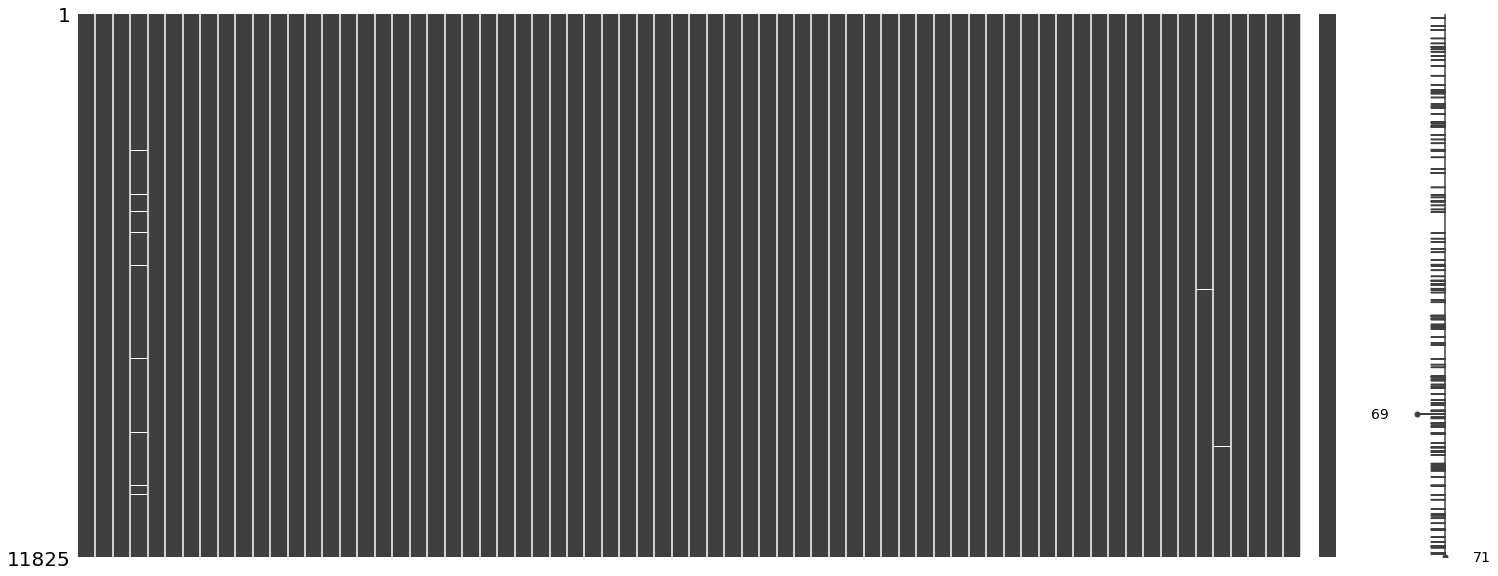

time: 699 ms (started: 2021-11-10 22:47:58 +00:00)


In [ ]:
import missingno as msno

msno.matrix(df_all)

In [ ]:
df_all.shape

(11825, 72)

time: 10.5 ms (started: 2021-11-11 00:14:29 +00:00)


In [ ]:
binary = [
          "inout",
          "explnstp",
          "othpers",
          "arstmade",
                  "sumissue",
                  "offunif",
                  "frisked",
                  "searched",
                  "contrabn",
                  "pistol",
                  "riflshot",
                  "asltweap",
                  "knifcuti",
                  "othrweap",
                  "pf_hands",
                  "pf_wall",
                  "pf_grnd",
                  "pf_drwep",
                  "pf_ptwep",
                  "pf_baton",
                  "pf_hcuff",
                  "pf_pepsp",
                  "pf_other",
                  "radio",
                  "ac_rept",
                  "ac_inves",
                  "ac_proxm",
                  "ac_evasv",
                  "ac_assoc",
                  "ac_cgdir",
                  "ac_incid",
                  "ac_time",
                  "ac_stsnd",
                  "ac_other",
                  "rf_vcrim",
                  "rf_othsw",
                  "rf_attir",
                  "rf_vcact",
                  "rf_rfcmp",
                  "rf_verbl",
                  "rf_knowl",
                  "rf_furt",
                  "rf_bulg",
                  "cs_objcs",
                  "cs_descr",
                  "cs_casng",
                  "cs_lkout",
                  "cs_cloth",
                  "cs_drgtr",
                  "cs_furtv",
                  "cs_vcrim",
                  "cs_bulge",
                  "cs_other",
                  "sb_hdobj",
                  "sb_outln",
                  "sb_admis",
                  "sb_other"             
                  ]

dummy = [
        "typeofid",
        "sex",
        "race",
        "eyecolor",
        "haircolr",
        "build",
        "city",
        "detailcm",
                ]

time: 24.7 ms (started: 2021-11-11 00:14:37 +00:00)


In [ ]:
def df_preprocessing(dataframe, dummy, binary):

  tmp = dataframe

  tmp = pd.get_dummies(data = tmp,
                      columns = dummy) #drop_first = False por defecto

  tmp = pd.get_dummies(data = tmp,
                      columns = binary,
                      drop_first = True)
    
  return tmp

time: 4.78 ms (started: 2021-11-11 00:14:43 +00:00)


In [ ]:
df_all = df_preprocessing(df_all, dummy, binary)

time: 142 ms (started: 2021-11-11 00:14:46 +00:00)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(df_all.columns.values)

array(['year', 'datestop', 'perobs', 'perstop', 'age', 'weight', 'height',
       'typeofid_O', 'typeofid_P', 'typeofid_R', 'typeofid_V', 'sex_F',
       'sex_M', 'sex_Z', 'race_A', 'race_B', 'race_I', 'race_P', 'race_Q',
       'race_W', 'race_X', 'race_Z', 'eyecolor_BK', 'eyecolor_BL',
       'eyecolor_BR', 'eyecolor_DF', 'eyecolor_GR', 'eyecolor_GY',
       'eyecolor_HA', 'eyecolor_MA', 'eyecolor_VI', 'eyecolor_XX',
       'haircolr_BA', 'haircolr_BK', 'haircolr_BL', 'haircolr_BR',
       'haircolr_DY', 'haircolr_GY', 'haircolr_SN', 'haircolr_SP',
       'haircolr_XX', 'haircolr_ZZ', 'build_H', 'build_M', 'build_T',
       'build_U', 'build_Z', 'city_BRONX', 'city_BROOKLYN',
       'city_MANHATTAN', 'city_QUEENS', 'city_STATEN ISLAND', 'detailcm_',
       'detailcm_10', 'detailcm_100', 'detailcm_102', 'detailcm_108',
       'detailcm_112', 'detailcm_113', 'detailcm_14', 'detailcm_15',
       'detailcm_17', 'detailcm_19', 'detailcm_20', 'detailcm_21',
       'detailcm_22', 'detailcm_

time: 6.36 ms (started: 2021-11-11 00:14:51 +00:00)


In [ ]:
for i in df_all:
  print(df_all[i].value_counts(normalize = True,
                            dropna = False))

2010    0.508499
2009    0.491501
Name: year, dtype: float64
2112009     0.003383
5282010     0.002960
1222009     0.002791
4232010     0.002706
1232010     0.002706
5132010     0.002706
4072009     0.002622
5292010     0.002622
2252009     0.002537
5142010     0.002537
10162010    0.002537
5052010     0.002537
3102010     0.002452
1142009     0.002452
5142009     0.002452
4302010     0.002452
8212009     0.002368
2042010     0.002368
3282009     0.002368
1302009     0.002368
5012010     0.002368
1172009     0.002368
10222010    0.002368
1122010     0.002368
1092009     0.002283
12022010    0.002283
4292009     0.002283
5212010     0.002283
12182010    0.002283
2282009     0.002283
2032010     0.002283
2142009     0.002283
4282010     0.002283
7032010     0.002199
2042009     0.002199
3052009     0.002199
8132009     0.002199
4172009     0.002199
5092009     0.002199
9302010     0.002199
2202010     0.002199
3112009     0.002199
11272010    0.002199
4042009     0.002199
2122010     0.0

Se realizará la creación del vector objetivo del caso 2, siguiendo: si uno o más vectores relacionados a acciones físicas realizadas por el personal de la policía es positiva => <code>pf_general = 1</code>, de lo contrario, <code>pf_general = 0</code>. Utilizando <code>np.where</code> puede escribirse de la forma siguiente:



In [ ]:
df_all["pf_general"] = np.where((df_all["pf_hands_Y"] + df_all["pf_wall_Y"] + df_all["pf_grnd_Y"] + df_all["pf_drwep_Y"] + df_all["pf_ptwep_Y"] + df_all["pf_baton_Y"] + df_all["pf_hcuff_Y"] + df_all["pf_pepsp_Y"] + df_all["pf_other_Y"]) > 0, 1, 0)

time: 15.5 ms (started: 2021-11-11 00:15:02 +00:00)


In [ ]:
df_all["pf_general"].value_counts("%")

0    0.754165
1    0.245835
Name: pf_general, dtype: float64

time: 9.72 ms (started: 2021-11-11 00:15:03 +00:00)


Finalmente, puede aplicarse <code>.drop()</code> y posteriormente separar los DataFrame en función del año.

In [ ]:
df_all.dropna(inplace = True)
df_all.reset_index(inplace = True)

time: 30.3 ms (started: 2021-11-11 00:15:05 +00:00)


In [ ]:
df_all

In [ ]:
print(" Shape de DataFrame 2009: ", len(df_all[df_all["year"] == 2009]),
      "\n",
      "Shape de DataFrame 2010: ", len(df_all[df_all["year"] == 2010]),
      "\n",
      "Shape de DataFrame completo ", len(df_all))

 Shape de DataFrame 2009:  5724 
 Shape de DataFrame 2010:  5938 
 Shape de DataFrame completo  11662
time: 27.6 ms (started: 2021-11-11 00:20:16 +00:00)


Considerando la información inicial, el porcentaje de pérdida de cada caso es de:

1. Año 2009: 1.5%
2. Año 2010: 1.2%
3. Total: 1.4%

## XXX **Caracterización de vectores objetivo**

### **12.2 Vectores objetivo**

# CORREGIR!!!!!!!!!!

1. Para poder crear el vector objetivo del caso 2, se adelantará la conversión de columnas de los atributos de la sección 11.2.
2. Se realizará creación de vector objetivo del caso 2.
3. Posteriormente se hará conversión de los valores del vector objetivo del caso 1.
4. Se graficarán los valores para observar su comportamiento. 

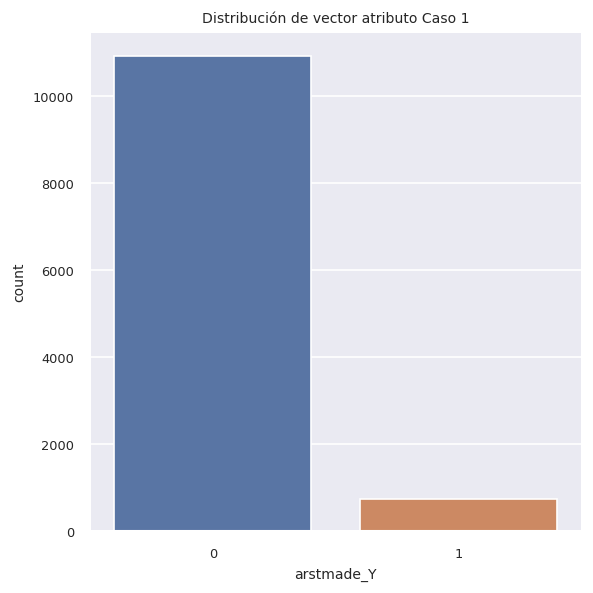

time: 291 ms (started: 2021-11-11 00:40:16 +00:00)


In [ ]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
sns.set_style("darkgrid")s
plt.rcParams["figure.figsize"] = (5, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos (también modifica tamaño)

ax = sns.countplot(x = df_all["arstmade_Y"])
plt.title(f"Distribución de vector atributo Caso 1")

plt.tight_layout()

In [ ]:
df_all["arstmade_Y"].value_counts("%")

0    0.93646
1    0.06354
Name: arstmade_Y, dtype: float64

time: 15.9 ms (started: 2021-11-11 00:40:27 +00:00)


Comentarios:

1. El vector objetivo del caso 1 corresponde a un 6% de los registros totales, esto implica que de cada 100 controles y registros (siempre acotándose al contexto del DataFrame), solo 6 terminan en arresto, luego de comprobar que el sospechoso habría cometido algún delito o infracción.

2. Se constata un desbalance importante en el conjunto de datos, lo que puede provocar problemas en la modelación para la mejora y ajuste de las métricas con esta clase.

3. Dado este desequilibrio se revisará la posibilidad de balancear las clases en el DataFrame.

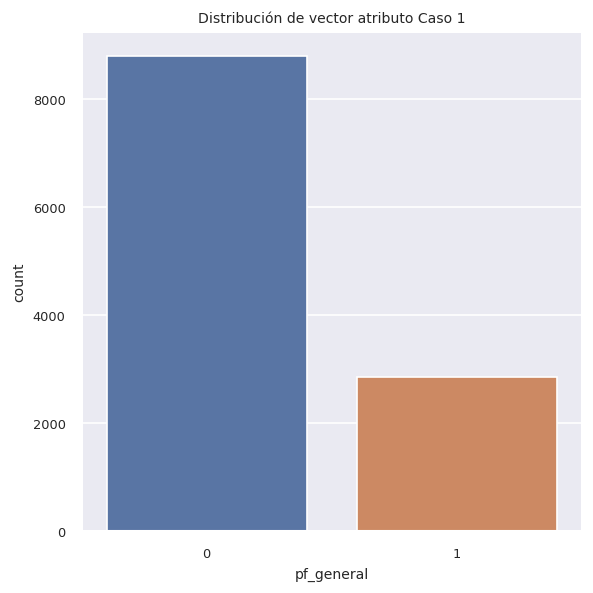

time: 259 ms (started: 2021-11-11 00:40:36 +00:00)


In [ ]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (5, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos (también modifica tamaño)

ax = sns.countplot(x = df_all["pf_general"])
plt.title(f"Distribución de vector atributo Caso 1")

plt.tight_layout()

In [ ]:
df_all["pf_general"].value_counts("%")

0    0.754588
1    0.245412
Name: pf_general, dtype: float64

time: 12.5 ms (started: 2021-11-11 00:40:43 +00:00)


Comentarios:

1. El vector objetivo en este segundo caso tiene un 25% de los registros: reúne todas aquellas acciones registradas en las que la policía usó fuerza física en cualquiera de sus categorías.
2. Por un lado, esto demuestra la cantidad importante de ocasiones en las cuales esta organización (acotándose al contexto del dataframe exclusivamente) utiliza este recurso. Por otra parte, el desbalanceo de clases en este caso es menos crítico que en el caso anterior.



# ver distribución por año

## **Análisis de atributos**

Se va a realizar en las etapas siguientes:

1. División del DataFrame según tipos de atributo (solo con fines de graficar)
2. Revisión de distribución discriminando por valores del vector objetivo en cada caso.
3. Aplicación de test de hipótesis para analizar diferencias entre distribuciones de atributos según año: permite saber si atributos serán útiles o no para los modelos: si las distribuciones son significativamente distintas deberán excluirse.


### **Fuentes**

1. <code>https://eldiariony.com/2012/05/09/sostienen-que-stop-and-frisk-es-racista/</code>
2. <code>https://scholarship.law.wm.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=2745&context=facpubs</code>
3. <code>https://www.nyclu.org/en/stop-and-frisk-data</code>
4. <code>https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py</code>